In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KernelDensity


# TASK 2: DATA UNDERSTANDING

In [2]:
df = pd.read_csv('../training_set_VU_DM.csv')
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

<AxesSubplot:title={'center':'Distribution of frequency of destination country hotel bookings'}, xlabel='prop_country_id', ylabel='Count'>

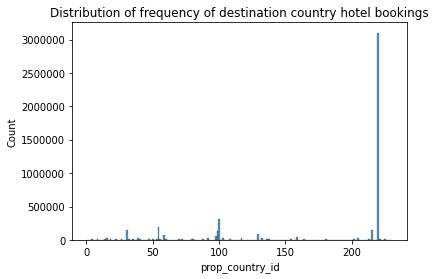

In [3]:
plt.ticklabel_format(style='plain', axis='y')
plt.title('Distribution of frequency of destination country hotel bookings')
sns.histplot(data=df['prop_country_id'])

- Analysing missing values

In [4]:
missing_df = pd.DataFrame(df.isnull().sum()/len(df))*100
missing_df.reset_index(inplace=True)
missing_df.rename(columns={0: 'percentage', 'index':'column'}, inplace=True)
missing_df = missing_df.sort_values(by = 'percentage', ascending = False)
missing_df

,column,percentage
29,comp1_rate_percent_diff,98.095353
44,comp6_rate_percent_diff,98.060362
27,comp1_rate,97.581250
28,comp1_inv,97.387053
38,comp4_rate_percent_diff,97.356256
52,gross_bookings_usd,97.208949
47,comp7_rate_percent_diff,97.206428
42,comp6_rate,95.156511
4,visitor_hist_starrating,94.920364
5,visitor_hist_adr_usd,94.897735


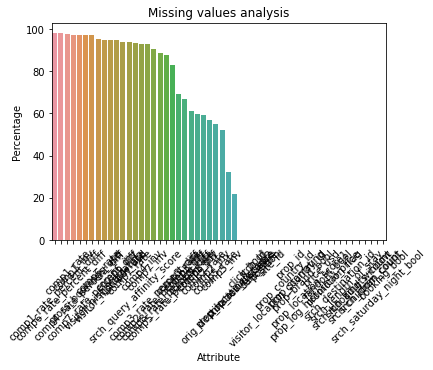

In [5]:
sns.barplot(x=missing_df['column'], y=missing_df['percentage'], dodge=0.8)
plt.xticks(rotation = 45)

# Add labels and title
plt.xlabel('Attribute')
plt.ylabel('Percentage')
plt.title('Missing values analysis')

plt.show()

# Data imputation

In [6]:
# Get non-missing values from the column
non_missing_values = df['orig_destination_distance'].dropna()

# Reshape the values for input to KDE
values = non_missing_values.values.reshape(-1, 1)

# Create and fit the KDE model
kde = KernelDensity(bandwidth=0.75)  # Adjust the bandwidth as needed
kde.fit(values)

# Generate random values based on the KDE model
random_values = kde.sample(df['orig_destination_distance'].isna().sum()).reshape(-1)

# Fill the missing values with the generated random values
df.loc[df['orig_destination_distance'].isna(), 'orig_destination_distance'] = random_values

In [7]:
threshold = len(df) * 0.5  # Set the threshold as 50% of the total rows
df.dropna(thresh=threshold, axis=1, inplace=True)

In [8]:
for col, count in df.nunique().to_dict().items():
    print(f'{col} : {count}')

srch_id : 199795
date_time : 198615
site_id : 34
visitor_location_country_id : 210
prop_country_id : 172
prop_id : 129113
prop_starrating : 6
prop_review_score : 10
prop_brand_bool : 2
prop_location_score1 : 337
prop_location_score2 : 9342
prop_log_historical_price : 392
position : 40
price_usd : 76465
promotion_flag : 2
srch_destination_id : 18127
srch_length_of_stay : 36
srch_booking_window : 429
srch_adults_count : 9
srch_children_count : 10
srch_room_count : 8
srch_saturday_night_bool : 2
orig_destination_distance : 2138377
random_bool : 2
click_bool : 2
booking_bool : 2


# TASK 3: DATA PREPARATION 

- Encoding the categorical columns as category 

In [9]:
categorical_cols = ['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'srch_destination_id']
df[categorical_cols] = df[categorical_cols].astype('category')


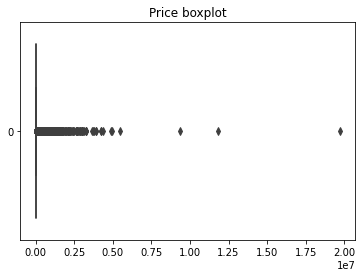

In [10]:

# Create a boxplot using seaborn
sns.boxplot(data=df['price_usd'], orient='h')
plt.title('Price boxplot')
plt.show()

In [11]:
rows_before = df.shape[0]

In [12]:
# Eliminating rows with outlier prices
z_scores = np.abs((df['price_usd'] - df['price_usd'].mean()) / df['price_usd'].std())
threshold = 3
df = df[z_scores <= threshold]

In [13]:
rows_after = df.shape[0]
print(f'{rows_before - rows_after} rows were eliminated')

1120 rows were eliminated


### Normalizing columns to reduce the impact of large values on the modeling
- particularly price column since it will vary based on location and to reduce its impact from shadowning other attributes
- since the prices will vary based on country it is logical to group by country id and normalize per country

In [14]:
columns_to_normalize = ['price_usd']

for col in columns_to_normalize:
    df[col] = df.groupby('prop_country_id')[col].transform(lambda x: (x.max() - x) / (x.max() - x.min()))


### Extracting month, day of week from  from date attribute

In [15]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['day_of_week'] = df['date_time'].dt.day_of_week

df =  df.drop('date_time', axis=1)

In [16]:
df['is_prop_in_same_country'] = df.apply( lambda x: 1 if x['srch_destination_id'] == x['visitor_location_country_id'] else 0, axis=1)
df['is_prop_in_same_country'].value_counts()
df=df.drop(['is_prop_in_same_country'],axis=1)

# since users country location and the destination country location is majorly different the attribute visitor_location_country_id
# does not seem to be relevant and can be dropped

In [17]:
df.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'click_bool', 'booking_bool', 'month', 'day_of_week'],
      dtype='object')

Submissions for each user query should recommend hotels in order from the highest grade
(most likely to purchase a hotel room) to the lowest grade (least likely to purchase a hotel
room or click on the hotel).

In [18]:
# Fill the missing values with the median, as the data is not distributed normally
df['prop_review_score'].fillna(df['prop_review_score'].median(), inplace=True)

In [19]:

df['relevance'] = df.apply(lambda x: ((x['prop_starrating'] * x['prop_review_score'])/ 100) * (x['booking_bool'] * 4 + x['click_bool']*1), axis=1)

# Since a customer is less likely to book a hotel if it has no ratings or no score we want to place it low on list
# df['relevance'] = df.apply(lambda x:  0 if x['prop_location_score2'].is else 1, axis=1)
# df['relevance'] = df.apply(lambda x:  0 if x['prop_review_score'] else 1, axis=1)


Add a column with an interaction between prop-starrating and prop_location_score1 to represent the overall desirability of a hotel based on star rating and location score

In [20]:
# Create a new feature by multiplying 'prop_starrating' and 'prop_location_score1'
df['prop_starrating_location_interaction'] = df['prop_starrating'] * df['prop_location_score1']


# Create a new feature interaction between price_usd and prop_log_historical_price to capture the 
# relative price compared to historical prices 
#df['price_historical_interaction'] = abs(df['price_usd'] - df['prop_log_historical_price'])

# Create a new feature interaction between srch_length_of_stay and srch_booking_window to represent
# the total duration of the stay and planning horizon
df['total_time_duration'] = df['srch_length_of_stay'] + df['srch_booking_window']

# Create a new column 'highly_rated_prop' based on 'prop_starrating'
df['highly_rated_prop'] = df['prop_starrating'].apply(lambda x: 1 if x >= 4 else 0)

df['total_people'] = df['srch_children_count'] + df['srch_adults_count']

In [21]:
df['mean_price_by_country'] = abs(df['price_usd'] - df.groupby('prop_country_id')['price_usd'].transform('mean'))

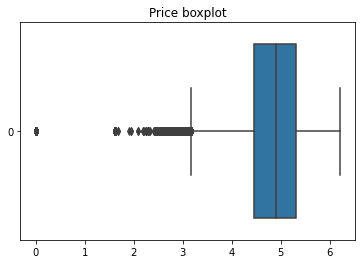

In [22]:
# Create a boxplot using seaborn
sns.boxplot(data=df['prop_log_historical_price'], orient='h')
plt.title('Price boxplot')
plt.show()

In [23]:
df['has_promotion_and_highly_rated'] = (df['promotion_flag'] & df['highly_rated_prop']).astype(int)

In [24]:
# dropping site_id column as it doesnt seeem that relevant given that its all expedia sites should nt add much relevant info for prediction purpose\
# drop srch_children_count and srch_adults_count as its already factored in total_people attribute
df.drop(['site_id', 'srch_children_count', 'srch_adults_count', 'visitor_location_country_id'], axis=1, inplace=True)

In [25]:
df.columns

Index(['srch_id', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'click_bool', 'booking_bool', 'month', 'day_of_week', 'relevance',
       'prop_starrating_location_interaction', 'total_time_duration',
       'highly_rated_prop', 'total_people', 'mean_price_by_country',
       'has_promotion_and_highly_rated'],
      dtype='object')

In [26]:
# Saving the preprocessed data
#df.to_csv('train_preprocessed_2.csv', index=False)

# Preprocessing test data 

In [27]:
test_df = pd.read_csv('../test_set_VU_DM.csv')
test_df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

In [28]:
test_df['date_time'] = pd.to_datetime(test_df['date_time'])
test_df['month'] = test_df['date_time'].dt.month
test_df['day_of_week'] = test_df['date_time'].dt.day_of_week

test_df =  test_df.drop('date_time', axis=1)

- replacing the outliers outside 3 standard deviations with the 99th percentile price

In [29]:
test_df['75th_percentile'] = test_df.groupby('prop_id')['price_usd'].transform(lambda x: np.percentile(x, 75))
test_df['mean'] = test_df.groupby('prop_id')['price_usd'].transform('mean')
test_df['std'] = test_df.groupby('prop_id')['price_usd'].transform('std')
threshold = 3
test_df['is_outlier'] = abs(test_df['price_usd'] - test_df['mean']) > threshold * test_df['std']
test_df.loc[test_df['is_outlier'], 'price_usd'] = test_df.loc[test_df['is_outlier'], '75th_percentile']
print(test_df['is_outlier'].value_counts())
test_df = test_df.drop(['75th_percentile', 'mean', 'std', 'is_outlier'], axis=1)

False    4911270
True       47913
Name: is_outlier, dtype: int64


In [30]:
# # Create a new feature by multiplying 'prop_starrating' and 'prop_location_score1'
test_df['prop_starrating_location_interaction'] = test_df['prop_starrating'] * test_df['prop_location_score1']


# # Create a new feature interaction between price_usd and prop_log_historical_price to capture the 
# # relative price compared to historical prices 
#test_df['price_historical_interaction'] = abs(test_df['price_usd'] - test_df['prop_log_historical_price'])

# # Create a new feature interaction between srch_length_of_stay and srch_booking_window to represent
# # the total duration of the stay and planning horizon
test_df['total_time_duration'] = test_df['srch_length_of_stay'] * test_df['srch_booking_window']

# Create a new column 'highly_rated_prop' based on 'prop_starrating'
test_df['highly_rated_prop'] = test_df['prop_starrating'].apply(lambda x: 1 if x >= 4 else 0)

test_df['total_people'] = test_df['srch_children_count'] + test_df['srch_adults_count']

In [31]:
test_df['mean_price_by_country'] = abs(test_df['price_usd'] - test_df.groupby('prop_country_id')['price_usd'].transform('mean'))

In [32]:
test_df['has_promotion_and_highly_rated'] = (test_df['promotion_flag'] & test_df['highly_rated_prop']).astype(int)

In [33]:
cols = df.columns
cols = [x for x in cols if x not in ['position', 'click_bool', 'booking_bool','position','random_bool','relevance']]

test_df = test_df[cols]

In [34]:
categorical_cols = ['srch_id', 'prop_country_id', 'prop_id', 'srch_destination_id']
test_df[categorical_cols] = test_df[categorical_cols].astype('category')

In [35]:
columns_to_normalize = ['price_usd']

for col in columns_to_normalize:
    test_df[col] = test_df.groupby('prop_country_id')[col].transform(lambda x: (x.max() - x) / (x.max() - x.min()))

In [36]:
# dropping site_id column as it doesnt seeem that relevant given that its all expedia sites should nt add much relevant info for prediction purpose
# test_df.drop(['site_id', 'srch_children_count', 'srch_adults_count'], axis=1, inplace=True)

In [37]:
test_df.columns

Index(['srch_id', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'month', 'day_of_week',
       'prop_starrating_location_interaction', 'total_time_duration',
       'highly_rated_prop', 'total_people', 'mean_price_by_country',
       'has_promotion_and_highly_rated'],
      dtype='object')

## Normalize prices

In [38]:
# Combine training set and test set prices
combined_prices = np.concatenate((df['price_usd'], test_df['price_usd']))

In [39]:
# Reshape the prices to a 2D array for MinMaxScaler
combined_prices = combined_prices.reshape(-1, 1)

# Initialize and fit the MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(combined_prices)

# Normalize the prices in the training set
df['normalized_price'] = scaler.transform(df['price_usd'].values.reshape(-1, 1))

# Normalize the prices in the test set
test_df['normalized_price'] = scaler.transform(test_df['price_usd'].values.reshape(-1, 1))

In [40]:
df.columns

Index(['srch_id', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'click_bool', 'booking_bool', 'month', 'day_of_week', 'relevance',
       'prop_starrating_location_interaction', 'total_time_duration',
       'highly_rated_prop', 'total_people', 'mean_price_by_country',
       'has_promotion_and_highly_rated', 'normalized_price'],
      dtype='object')

In [41]:
df.to_csv('train_preprocessed_2.csv', index=False)

In [42]:
test_df.to_csv('test_preprocessed_2.csv', index=False)